<a href="https://colab.research.google.com/github/x1nx3r/image-analysis-learning-journals/blob/main/open_and_create_a_histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is the part where you upload an image

In [31]:
from google.colab import files

# open an upload dialog
uploaded = files.upload()

Saving Gambar Pemandangan Alam Terindah di Dunia Puncak Gung Bukit Hijau Cantik.jpg to Gambar Pemandangan Alam Terindah di Dunia Puncak Gung Bukit Hijau Cantik.jpg


# This is the part where the image is shown to you

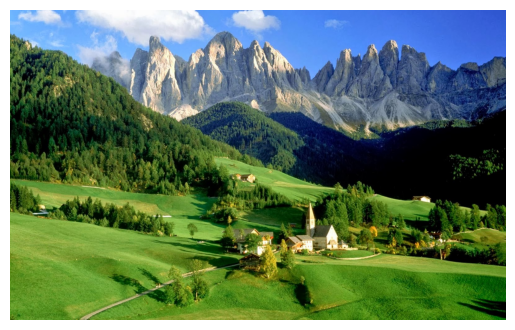

In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Get the uploaded file name
filename = list(uploaded.keys())[0]

# show the uploaded image
img = mpimg.imread(filename)
plt.imshow(img)
plt.axis("off")
plt.show()

## Defining a manual way to get the histogram of an image

In [53]:
def compute_histogram(image):
    """ Compute histogram of a grayscale image manually """
    hist = np.zeros(256)  # Create an array for 256 intensity levels

    # Flatten the image and count occurrences of each intensity
    for pixel in image.flatten():
        hist[int(pixel)] += 1  # Convert float intensity to integer bin

    return hist

# This is the part where the histogram of the image is shown to you

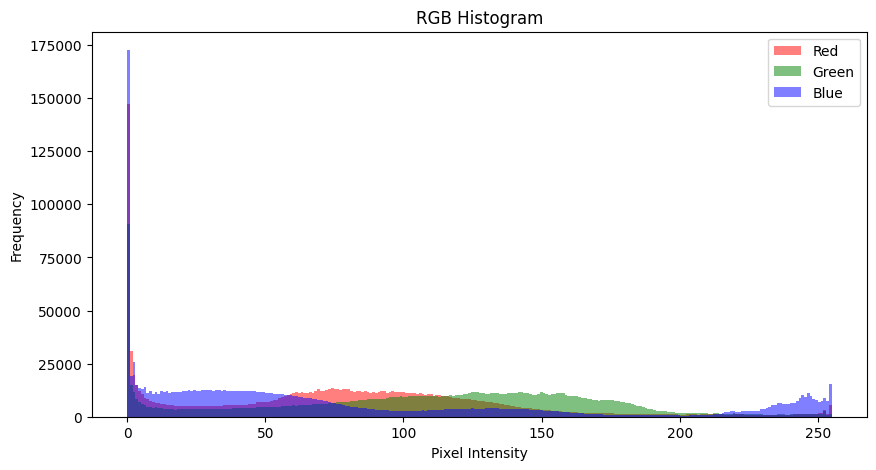

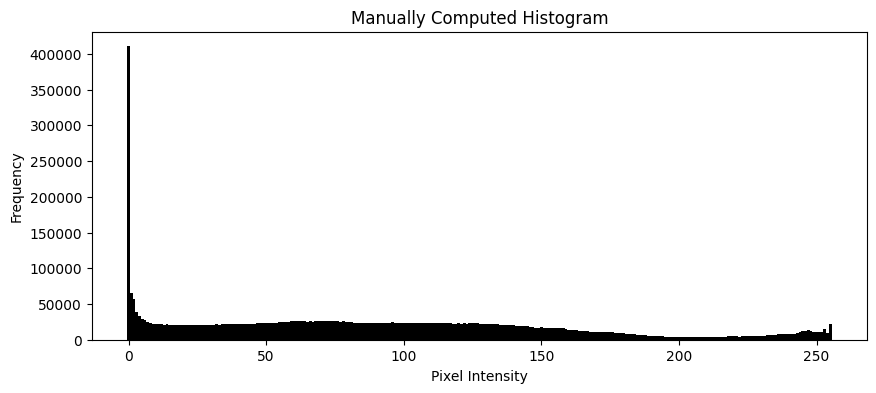

In [55]:
# Flatten the image into separate R, G, B channels
r_vals = img[:, :, 0].flatten()
g_vals = img[:, :, 1].flatten()
b_vals = img[:, :, 2].flatten()

# Plot the histogram for each channel
plt.figure(figsize=(10, 5))
plt.hist(r_vals, bins=256, color="red", alpha=0.5, label="Red")
plt.hist(g_vals, bins=256, color="green", alpha=0.5, label="Green")
plt.hist(b_vals, bins=256, color="blue", alpha=0.5, label="Blue")

plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.title("RGB Histogram")
plt.show()

# Compute histogram for the image
histogram = compute_histogram(img)

# Plot histogram
plt.figure(figsize=(10, 4))
plt.bar(range(256), histogram, color='black', width=1.0)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Manually Computed Histogram")
plt.show()

# Now this is the part where the image is converted to grayscale using the four different method available

## Averaging Method

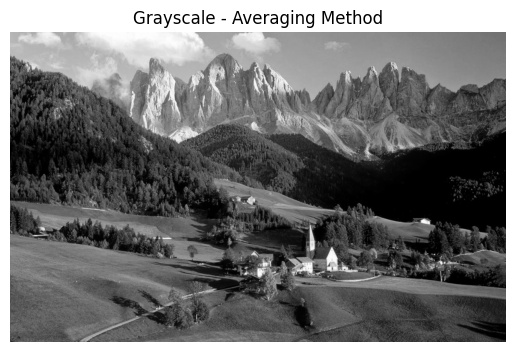

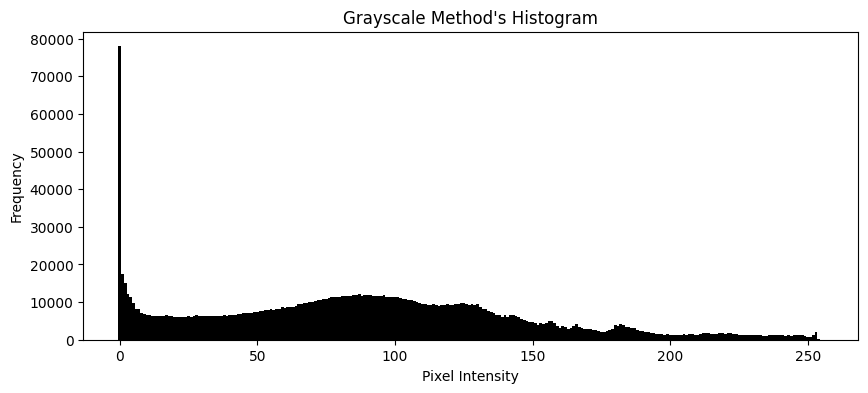

In [36]:
import numpy as np

def grayscale_average(img):
    return np.mean(img[:, :, :3], axis=2)  # Ignore alpha if present

gray_avg = grayscale_average(img)

plt.imshow(gray_avg, cmap="gray")
plt.axis("off")
plt.title("Grayscale - Averaging Method")
plt.show()

# Compute histogram for the grayscale image
histogram = compute_histogram(gray_avg)

# Plot histogram
plt.figure(figsize=(10, 4))
plt.bar(range(256), histogram, color='black', width=1.0)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Grayscale Method's Histogram")
plt.show()

## Weighted Luminance Method

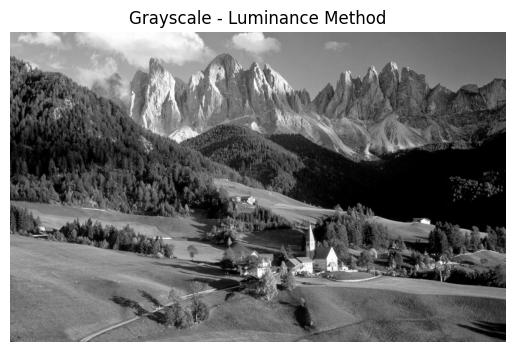

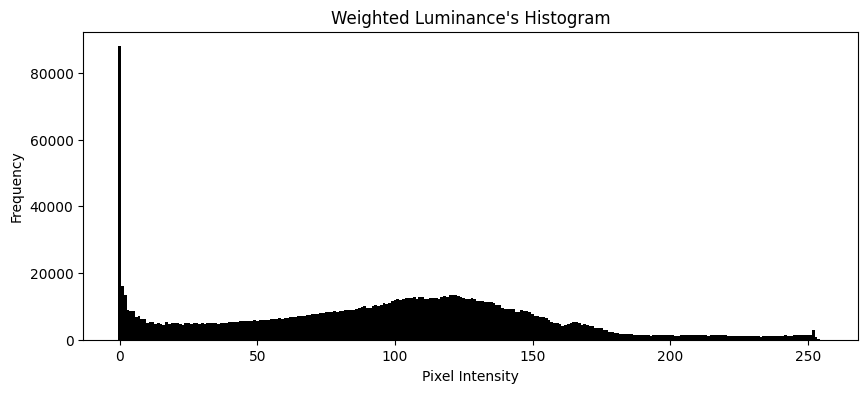

In [37]:
def grayscale_luminance(img):
    return img[:, :, 0] * 0.2989 + img[:, :, 1] * 0.5870 + img[:, :, 2] * 0.1140

gray_lum = grayscale_luminance(img)

plt.imshow(gray_lum, cmap="gray")
plt.axis("off")
plt.title("Grayscale - Luminance Method")
plt.show()

# Compute histogram for the grayscale image
histogram = compute_histogram(gray_lum)

# Plot histogram
plt.figure(figsize=(10, 4))
plt.bar(range(256), histogram, color='black', width=1.0)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Weighted Luminance's Histogram")
plt.show()

## Desaturation

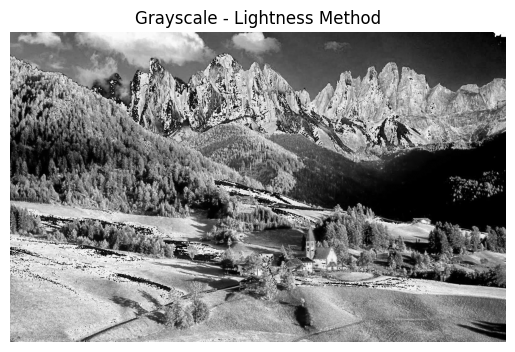

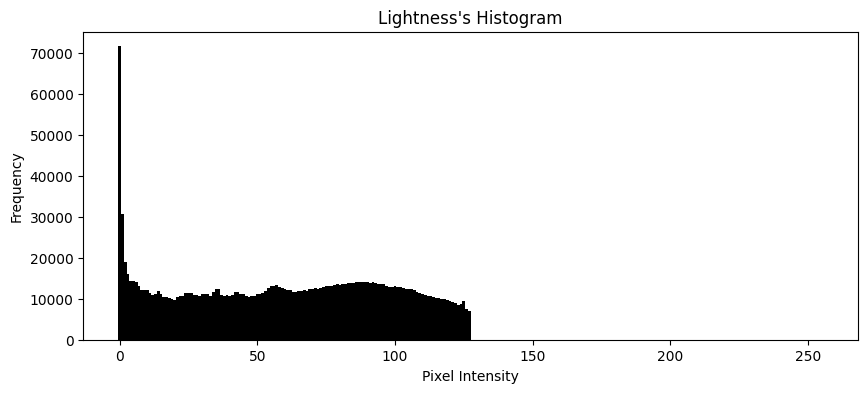

In [38]:
def grayscale_lightness(img):
    return (np.max(img[:, :, :3], axis=2) + np.min(img[:, :, :3], axis=2)) / 2

gray_light = grayscale_lightness(img)

plt.imshow(gray_light, cmap="gray")
plt.axis("off")
plt.title("Grayscale - Lightness Method")
plt.show()

# Compute histogram for the grayscale image
histogram = compute_histogram(gray_light)

# Plot histogram
plt.figure(figsize=(10, 4))
plt.bar(range(256), histogram, color='black', width=1.0)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Lightness's Histogram")
plt.show()

## Single-Channel Extraction

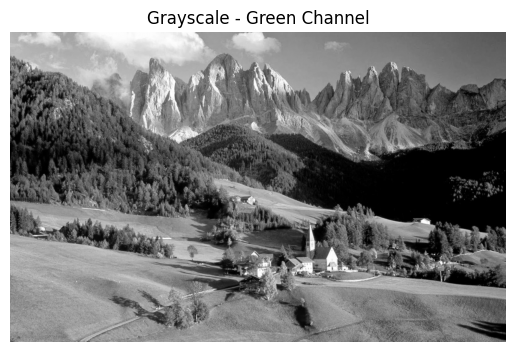

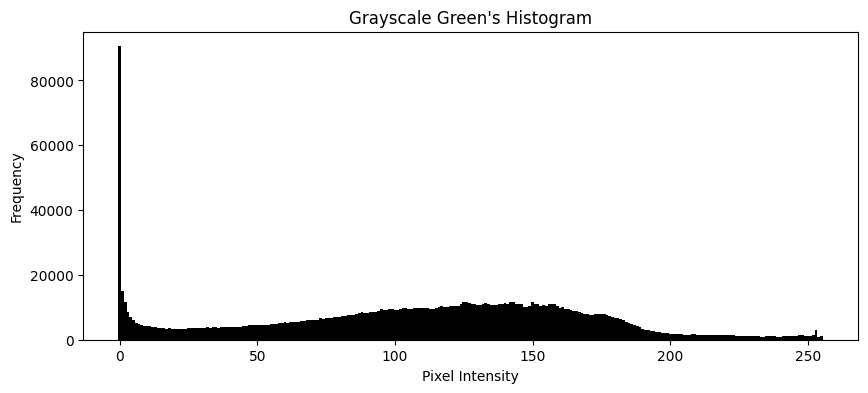

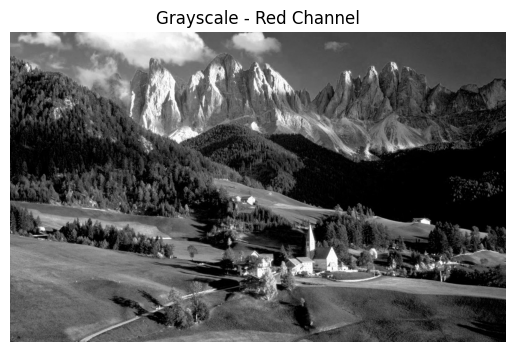

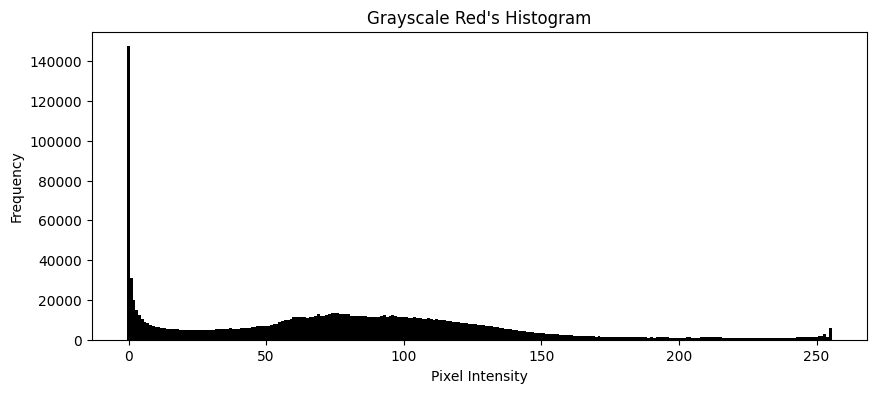

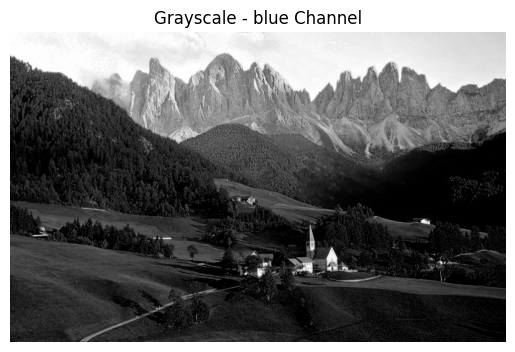

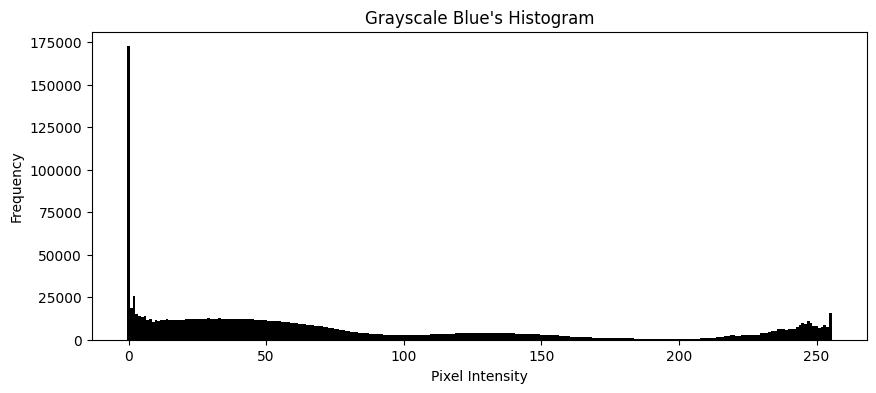

In [39]:
def grayscale_green_channel(img):
    return img[:, :, 1]  # Take only the Green channel

def grayscale_red_channel(img):
    return img[:, :, 0]  # Take only the Red channel

def grayscale_blue_channel(img):
    return img[:, :, 2]  # Take only the Blue channel

gray_green = grayscale_green_channel(img)

plt.imshow(gray_green, cmap="gray")
plt.axis("off")
plt.title("Grayscale - Green Channel")
plt.show()

# Compute histogram for the grayscale image
histogram = compute_histogram(gray_green)

# Plot histogram
plt.figure(figsize=(10, 4))
plt.bar(range(256), histogram, color='black', width=1.0)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Grayscale Green's Histogram")
plt.show()

gray_red = grayscale_red_channel(img)

plt.imshow(gray_red, cmap="gray")
plt.axis("off")
plt.title("Grayscale - Red Channel")
plt.show()

# Compute histogram for the grayscale image
histogram = compute_histogram(gray_red)

# Plot histogram
plt.figure(figsize=(10, 4))
plt.bar(range(256), histogram, color='black', width=1.0)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Grayscale Red's Histogram")
plt.show()

gray_blue = grayscale_blue_channel(img)

plt.imshow(gray_blue, cmap="gray")
plt.axis("off")
plt.title("Grayscale - blue Channel")
plt.show()

# Compute histogram for the grayscale image
histogram = compute_histogram(gray_blue)

# Plot histogram
plt.figure(figsize=(10, 4))
plt.bar(range(256), histogram, color='black', width=1.0)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Grayscale Blue's Histogram")
plt.show()

# Binary Thresholding

## Basic Binary Thresholding

I am using the weighted luminance's grayscale image for the thresholding, if you're looking to change it search for `gray_lum` variables in between the parameters and change it to any image you desire.

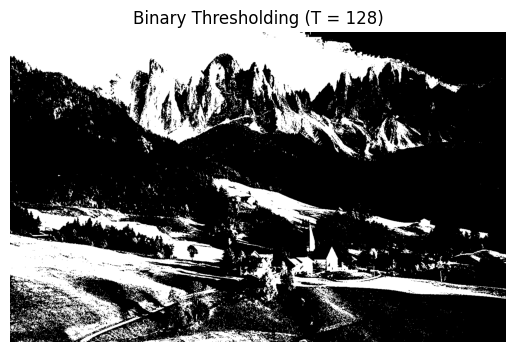

In [44]:
def binary_threshold(image, threshold=128):
    """ Apply binary thresholding to a grayscale image manually """
    binary_img = np.where(image >= threshold, 255, 0)  # Thresholding
    return binary_img.astype(np.uint8)

# Apply binary thresholding manually
threshold_value = 128
binary_img = binary_threshold(gray_lum, threshold=threshold_value)

# Display the binary image
plt.imshow(binary_img, cmap="gray")
plt.axis("off")
plt.title(f"Binary Thresholding (T = {threshold_value})")
plt.show()

## Inverted Binary Thresholding

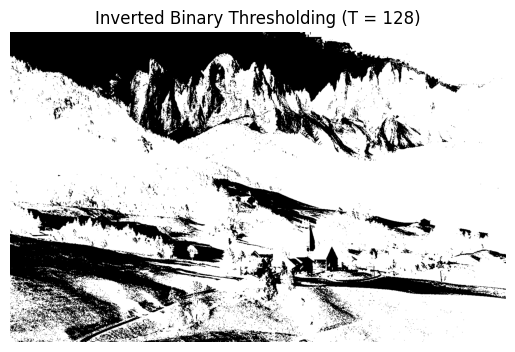

In [45]:
def inverted_threshold(image, threshold=128):
    """ Apply inverted binary thresholding manually """
    binary_img = np.where(image >= threshold, 0, 255)  # Inverted thresholding
    return binary_img.astype(np.uint8)

# Apply inverted binary thresholding manually
binary_inv_img = inverted_threshold(gray_lum, threshold=threshold_value)

# Display the inverted binary image
plt.imshow(binary_inv_img, cmap="gray")
plt.axis("off")
plt.title(f"Inverted Binary Thresholding (T = {threshold_value})")
plt.show()

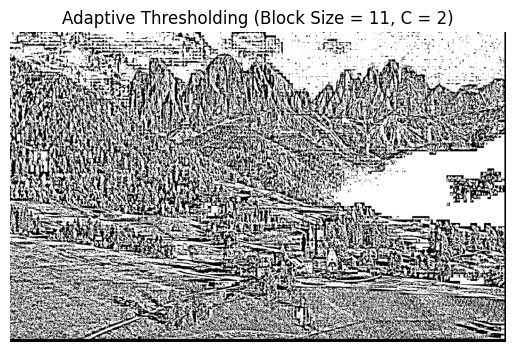

In [50]:
def adaptive_threshold(image, block_size=11, C=2):
    """ Apply adaptive thresholding (mean block-based) to a grayscale image """
    height, width = image.shape
    adaptive_img = np.zeros_like(image, dtype=np.uint8)

    # Iterate over each block
    for i in range(0, height - block_size, block_size):
        for j in range(0, width - block_size, block_size):
            # Extract block
            block = image[i:i + block_size, j:j + block_size]
            local_threshold = np.mean(block) - C  # Local threshold based on mean of block
            adaptive_img[i:i + block_size, j:j + block_size] = np.where(block >= local_threshold, 255, 0)

    return adaptive_img

# Apply adaptive thresholding manually
adaptive_img = adaptive_threshold(gray_lum, block_size=11, C=2)

# Display the adaptive binary image
plt.imshow(adaptive_img, cmap="gray")
plt.axis("off")
plt.title(f"Adaptive Thresholding (Block Size = 11, C = 2)")
plt.show()


## Otsu's Thresholding Method

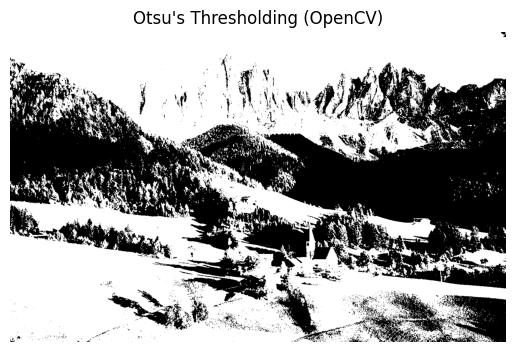

In [51]:
import cv2

# OpenCV Otsu's Thresholding
_, otsu_img = cv2.threshold(gray_lum.astype(np.uint8), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the Otsu thresholded image
plt.imshow(otsu_img, cmap="gray")
plt.axis("off")
plt.title("Otsu's Thresholding (OpenCV)")
plt.show()